In [1]:
#!/usr/bin/python3.10

Prerequisites: pandas, xlrd, matplotlib, rpy2

# HSMC modelling

## Configuration
### It is assumed that this notebook is run from StructureAnalysis/sequence_analysis/tutorials

**Import OpenAlea packages**

In [2]:
from openalea.stat_tool import _stat_tool
from openalea.sequence_analysis import _sequence_analysis
from openalea.sequence_analysis.hidden_semi_markov import HiddenSemiMarkov
from openalea.sequence_analysis.simulate import Simulate
from openalea.sequence_analysis.data_transform import Thresholding

from openalea.stat_tool.data_transform import *
from openalea.stat_tool.cluster import Cluster
from openalea.stat_tool.cluster import Transcode, Cluster

import openalea.stat_tool.plot #import DISABLE_PLOT
# openalea.stat_tool.plot.DISABLE_PLOT = True
from openalea.stat_tool.plot import DISABLE_PLOT
DISABLE_PLOT = False

import os

from openalea.stat_tool.output import plot, Plot

plot.DISABLE_PLOT = DISABLE_PLOT

from openalea.stat_tool.plot import get_plotter, mplotlib 

##### Check pandas version

In [3]:
# print pd.__version__

In [4]:
import xlrd
xlrd.__version__

'2.0.1'

For correct figure rendering

In [5]:
%matplotlib inline

##### Enabling R extensions

In [6]:
%load_ext rpy2.ipython

#####  Place variables in markdown outputs

In [7]:
from IPython.display import Markdown
from IPython.core.magic import register_cell_magic


@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))

## Determining if images have to be saved (not used for the moment)

## Loading and preparing data

In [8]:
import sys, os

In [9]:
sys.path

['/home/jdurand/devlp/Git/openalea/StructureAnalysis',
 '/home/jdurand/miniforge3/envs/openalea/lib/python310.zip',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/lib-dynload',
 '',
 '/home/jdurand/.local/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/OpenAlea.SConsX-2.4.0-py3.9.egg',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/sequence_analysis/src',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/OpenAlea.StatTool-2.0.0-py3.10-linux-x86_64.egg',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/stat_tool/src',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/openalea.deploy-3.1.2-py3.10.egg']

In [10]:
sys.path.append(".." + os.sep + "tutorials")

In [11]:
# TODO: fix this
# get_shared_data("data")

In [12]:
from pathlib import Path
data_path = Path(openalea.sequence_analysis.__path__[0])
data_path = str(Path.joinpath(data_path.parent.parent.parent.absolute(), "share","data"))


**Read an existing HSMC model**

In [13]:
model_file = "test_hidden_semi_markov_param.dat"

f = open(data_path + os.sep + model_file, "r")
f.close()

hsm = HiddenSemiMarkov(data_path + os.sep + model_file)

1  HIDDEN_SEMI-MARKOV_CHAIN
2  
3  3 STATES
4  
5  INITIAL_PROBABILITIES
6  0.4 0.3 0.3
7  
8  TRANSITION_PROBABILITIES
9  0.0 0.8 0.2
10  0.2 0.0 0.8
11  0.8 0.2 0.0
12  
13  STATE 0 OCCUPANCY_DISTRIBUTION
14 NEGATIVE_BINOMIAL  INF_BOUND : 1  PARAMETER : 1  PROBABILITY : 0.95
15  
16  STATE 1 OCCUPANCY_DISTRIBUTION
17 NEGATIVE_BINOMIAL  INF_BOUND : 1  PARAMETER : 6  PROBABILITY : 0.5
18  
19  STATE 2 OCCUPANCY_DISTRIBUTION
20 NEGATIVE_BINOMIAL  INF_BOUND : 1  PARAMETER : 15  PROBABILITY : 0.5
21  
22  1 OUTPUT_PROCESS
23  
24  OUTPUT_PROCESS 1 : PARAMETRIC
25  
26  STATE 0 OBSERVATION_DISTRIBUTION
27 NEGATIVE_BINOMIAL  INF_BOUND : 1  PARAMETER : 1  PROBABILITY : 0.95
28  
29  STATE 1 OBSERVATION_DISTRIBUTION
30 NEGATIVE_BINOMIAL  INF_BOUND : 1  PARAMETER : 6  PROBABILITY : 0.5
31  
32  STATE 2 OBSERVATION_DISTRIBUTION
33 NEGATIVE_BINOMIAL  INF_BOUND : 1  PARAMETER : 15  PROBABILITY : 0.5


In [14]:
print(hsm.display())

HIDDEN_SEMI-MARKOV_CHAIN

3 STATES

INITIAL_PROBABILITIES
0.4  0.3  0.3  

TRANSITION_PROBABILITIES
0    0.8  0.2  
0.2  0    0.8  
0.8  0.2  0    

recurrent class: states 0 1 2

time up to the first occurrence of state 0 distribution
mean: 13.1945   median: 11   mode: 0
variance: 221.222   standard deviation: 14.8735   lower quartile: 0   upper quartile: 21

time up to the first occurrence of state 1 distribution
mean: 7.9683   median: 1   mode: 1
variance: 125.497   standard deviation: 11.2025   lower quartile: 0   upper quartile: 15

time up to the first occurrence of state 2 distribution
mean: 5.70639   median: 5   mode: 0
variance: 35.6158   standard deviation: 5.9679   lower quartile: 0   upper quartile: 9

state 0 recurrence time distribution
mean: 22.8494   median: 21   mode: 1
variance: 215.918   standard deviation: 14.6942   lower quartile: 13   upper quartile: 29

state 1 recurrence time distribution
mean: 3.43515   median: 1   mode: 1
variance: 54.7054   standard deviation

In [15]:
hsm.plot("Intensity", 1) 

<Figure size 1000x1000 with 0 Axes>

In [16]:
hsm.plot("Observation", 1)

<Figure size 1000x1000 with 0 Axes>

In [17]:
hsm.plot("Counting", 1)

<Figure size 1000x1000 with 0 Axes>

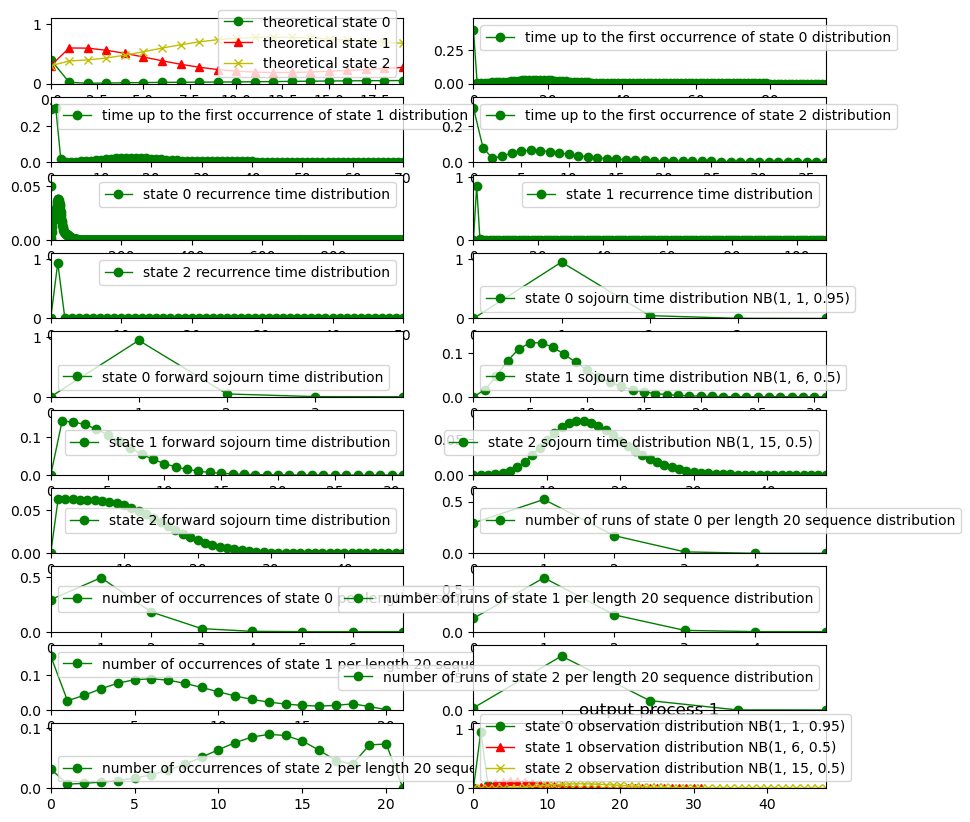

In [18]:
hsm.plot()

**Simulate sequences**

In [19]:
from openalea.sequence_analysis import Simulate

In [20]:
from openalea.stat_tool.distribution import set_seed
set_seed(0)

Simulate *nb_seq* sequences with length *seq_length*

In [21]:
nb_seq = 30
seq_length = 100
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)
assert(len(seq) == nb_seq)
assert(len(seq[0]) == seq_length)
# NB: hsm has 1 output process but simulation includes the hidden state
assert(len(seq[0][1]) == 2)


log-likelihood: -9419.2 | -9419.2

N.o. initial states in parallel: 0
0 0 0
1 0.99748 0.99748
2 0.00252017 0.00252017
0 0.00109897 0.00109897
1 0.9989 0.9989
2 1.18766e-06 1.18766e-06
0 0 0
1 0.00273566 0.00273566
2 0.997264 0.997264
0 0 0
1 0.999982 0.999982
2 1.82098e-05 1.82098e-05
0 0.985796 0.985796
1 0.0142044 0.0142044
2 2.18206e-08 2.18206e-08
0 1.35611e-296 1.35611e-296
1 0.998721 0.998721
2 0.00127852 0.00127852
0 0 0
1 0.00338586 0.00338586
2 0.996614 0.996614
0 0.000367021 0.000367021
1 0.999264 0.999264
2 0.000369059 0.000369059
0 0.972867 0.972867
1 0.027124 0.027124
2 9.38978e-06 9.38978e-06
0 0.99923 0.99923
1 0.000770376 0.000770376
2 1.1755e-08 1.1755e-08
0 1 1
1 2.23272e-311 2.23272e-311
2 3.09034e-306 3.09034e-306
0 7.51127e-62 7.51127e-62
1 0.000365354 0.000365354
2 0.999635 0.999635
0 0.982144 0.982144
1 0.0178546 0.0178546
2 1.39242e-06 1.39242e-06
0 0.99923 0.99923
1 0.000770376 0.000770376
2 1.1755e-08 1.1755e-08
0 0.99923 0.99923
1 0.000770376 0.000770376
2 1

In [22]:
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)


log-likelihood: -9359.86 | -9359.86

N.o. initial states in parallel: 0
0 0 0
1 0.00892167 0.00892167
2 0.991078 0.991078
0 0 0
1 0.00134911 0.00134911
2 0.998651 0.998651
0 0.978647 0.978647
1 0.0213084 0.0213084
2 4.48725e-05 4.48725e-05
0 0.972389 0.972389
1 0.0276106 0.0276106
2 1.73534e-07 1.73534e-07
0 0.997334 0.997334
1 0.00240725 0.00240725
2 0.000259091 0.000259091
0 0 0
1 0.00198551 0.00198551
2 0.998014 0.998014
0 0.00150904 0.00150904
1 0.998484 0.998484
2 6.82804e-06 6.82804e-06
0 0.972186 0.972186
1 0.0278122 0.0278122
2 1.6117e-06 1.6117e-06
0 0.99923 0.99923
1 0.000770376 0.000770376
2 1.1755e-08 1.1755e-08
0 3.42133e-300 3.42133e-300
1 0.929081 0.929081
2 0.0709187 0.0709187
0 0.99923 0.99923
1 0.000770376 0.000770376
2 1.1755e-08 1.1755e-08
0 0 0
1 0.958455 0.958455
2 0.0415453 0.0415453
0 0.988101 0.988101
1 0.0118988 0.0118988
2 4.29539e-09 4.29539e-09
0 0 0
1 0.0049706 0.0049706
2 0.995029 0.995029
0 0.998398 0.998398
1 0.00144195 0.00144195
2 0.000159571 0.00015

In [23]:
# Print first simulated sequence.
# First variable is the simulated state
print(seq[0])

[[2, 20], [2, 7], [2, 18], [2, 9], [2, 9], [2, 13], [2, 14], [2, 16], [0, 2], [1, 13], [1, 5], [1, 10], [1, 5], [1, 8], [1, 5], [1, 4], [1, 7], [1, 11], [1, 14], [1, 5], [1, 8], [1, 10], [1, 4], [1, 7], [2, 6], [2, 17], [2, 17], [2, 31], [2, 18], [2, 16], [2, 11], [2, 12], [2, 21], [2, 9], [2, 6], [2, 17], [2, 18], [2, 21], [2, 16], [2, 21], [2, 21], [2, 14], [2, 9], [2, 20], [2, 27], [2, 22], [0, 1], [1, 10], [1, 9], [1, 8], [1, 3], [1, 4], [1, 10], [1, 7], [2, 14], [2, 17], [2, 17], [2, 19], [2, 19], [2, 17], [2, 11], [2, 16], [2, 9], [2, 17], [2, 29], [0, 1], [1, 18], [1, 10], [2, 12], [2, 22], [2, 29], [2, 17], [2, 16], [2, 15], [2, 18], [2, 18], [2, 16], [2, 20], [2, 14], [2, 21], [2, 17], [2, 13], [2, 11], [2, 15], [2, 15], [2, 13], [2, 17], [2, 5], [2, 13], [0, 1], [1, 4], [1, 10], [1, 4], [1, 7], [1, 4], [1, 7], [1, 6], [1, 4], [1, 7], [2, 22]]


Discard variable 1 (state)

In [24]:
obs = seq.select_variable([1], keep=False)

## Plotting marginal probabilities of data

In [25]:
# Variable 1
# obs.plot("Intensity", 1)

## HSCM re-estimation

### Reestimate from default initialisation

In [ ]:
from openalea.sequence_analysis import Estimate

nb_states = 3
seq_estim = seq.select_variable([2], True)

# TODO: why are two states the same?
# TODO: set seed
hsmc_est = Estimate(seq_estim, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300)   
print(hsmc_est.display())

In [ ]:
from openalea.sequence_analysis import Estimate

nb_states = 3
seq_estim = seq.select_variable([2], True)

# TODO: why are two states the same?
# TODO: set seed
hsmc_est = seq_estim.hidden_semi_markov_estimation_model("Ordinary", nb_states, "Irreducible", Nbiteration=300)   
print(hsmc_est.display())

In [ ]:
#%matplotlib inline

In [ ]:
# hsmc_est.plot("Intensity", 1) 

In [ ]:
hsmc_est.plot("Observation", 1)


In [ ]:
hsmc_est.plot("Counting", 1)


In [ ]:
hsmc_est.plot("Recurrence", 1)


In [ ]:
hsmc_est.plot("Sojourn", 1)


In [ ]:
hsmc_est.plot("NbRun", 1)


In [ ]:
hsmc_est.plot("NbOccurrence", 1)


In [ ]:
hsmc_est.plot("FirstOccurrence", 1)

In [ ]:
hsmc_est.plot()

In [ ]:
from openalea.sequence_analysis import seq_map
hsmc_est.extract(seq_map['Observation'],1,1).plot(Title="Observation distribution for state 1")

In [ ]:
hsmc_est.extract(seq_map['Sojourn'],0,0).plot(Title="Sojourn distribution for state 0")

### Reestimate from file for initialisation

In [ ]:
hsmc_est_file = Estimate(seq_estim, "HIDDEN_SEMI-MARKOV", hsm, Nbiteration=300)   
print(hsmc_est_file.display())

In [ ]:
from openalea.sequence_analysis import seq_map
hsmc_est_file.extract(seq_map['Observation'],1,1).plot(Title="Observation distribution for state 1")

In [ ]:
hsmc_est_file.extract(seq_map['Sojourn'],0,0).plot(Title="Sojourn distribution for state 0")